### ARCH (Autoregressive Conditional Heteroskedasticity)

$y_{t}=\frac{x_{t} - x_{t-1}}{x_{t-1}}$ (returns)

$\sigma_{t}^2 = \frac{1}{t}\sum_{i=1}^{t}(y_{t}-\bar{y})^2=\frac{1}{t}\sum_{i=1}^{t}y_{t}^2=\frac{1}{1}\sum_{i=1}^{1}y_{t}^2=y_{t}^2$ (variance or volatility of $y_{t}$; mean returns is zero and only one observation is possible)

ARCH(p) describes an ARCH model with p lags. The simplest model would be ARCH(1) as follows.

(1) $\sigma_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2$ (volatility of $y_{t}$ is conditional on $y_{t-1}$; may add more terms for more lags)

(2) $y_{t}=\sigma_{t}\epsilon_{t}=\epsilon_{t}\sqrt{\alpha_{0}+\alpha_{1}y_{t-1}^2}$

(3) $y_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\epsilon_{t}$

$\epsilon_{t} \sim N(\mu=0,\sigma^2=1)$ (error)

### GARCH (Generalized ARCH)

GARCH improves ARCH by including volatility from the previous time step in the current volatility term such that the causal relationship between periods of high or low volatility are considered.

GARCH(p, q) describes an GARCH model with p-order of $\sigma^2$ and q-order of $y_{t}$. The simplest model would be GARCH(1,1) as follows.

(1) $\sigma_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2$

(2) $y_{t}=\sigma_{t}\epsilon_{t}=\epsilon_{t}\sqrt{\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2}$

(3) $y_{t}^2=\alpha_{0}+\alpha_{1}y_{t-1}^2+\beta_{1}\sigma_{t-1}^2+\epsilon_{t}$

$\epsilon_{t} \sim N(\mu=0,\sigma^2=1)$ (error) 

Coefficients are estimated through maximum likelihood estimation with numerial optimization.

#### Conditions
(1) Time series must be stationary at a mean of zero.

(2) Time series must exhibit periods of similar volatility.

(3) Use the PACF (Partial Autocorrelation Function) to find the appropriate number of lags. PACF yields the correlation between lagged values within a stationary time series.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model
from download import download

apikey = open("apikey", "r").readline()

In [2]:
ticker = input("Ticker: ")
dat = download(ticker, apikey)
print(dat)

Ticker: SPY
            date  adjClose
0     2000-01-03   94.6000
1     2000-01-04   90.9000
2     2000-01-05   91.0600
3     2000-01-06   89.5900
4     2000-01-07   94.8000
...          ...       ...
5942  2023-08-16  439.6400
5943  2023-08-17  436.2900
5944  2023-08-18  436.5000
5945  2023-08-21  439.3400
5946  2023-08-22  439.1414

[5947 rows x 2 columns]


In [3]:
t0 = np.array(dat["adjClose"].iloc[0:-1])
t1 = np.array(dat["adjClose"].iloc[1:])

returns = (t1 - t0) * 100 / t0
print(pd.DataFrame(returns).describe())

                 0
count  5946.000000
mean      0.033537
std       1.241824
min     -10.944981
25%      -0.480925
50%       0.064768
75%       0.602552
max      14.517828


[Text(0.5, 0, 'SPY P&L'), Text(0, 0.5, 'Frequency')]

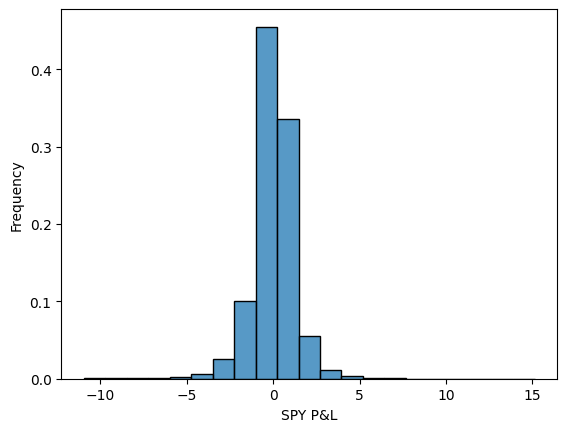

In [4]:
ax = sns.histplot(data=returns, binwidth=np.std(returns), stat="probability")
ax.set(xlabel="{} P&L" .format(ticker), ylabel="Frequency")

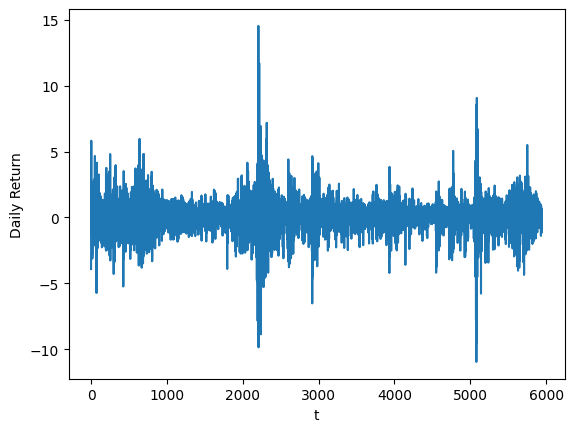

In [5]:
plt.plot(returns)
plt.xlabel("t")
plt.ylabel("Daily Return")
plt.show()

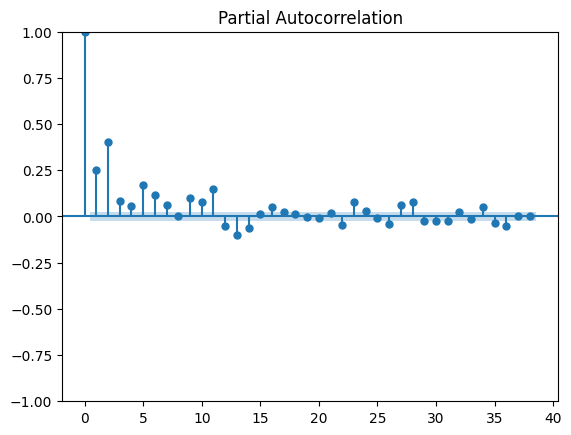

In [6]:
plot_pacf(returns**2)
plt.show()

In [7]:
model = arch_model(returns, p=2,q=2)

In [8]:
model.fit().summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 109571.86752070292
Iteration:      2,   Func. Count:     20,   Neg. LLF: 34536.185280997415
Iteration:      3,   Func. Count:     31,   Neg. LLF: 12598.423266680798
Iteration:      4,   Func. Count:     40,   Neg. LLF: 15375.47913849942
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2411823584.653678
Iteration:      6,   Func. Count:     57,   Neg. LLF: 8418.082491520112
Iteration:      7,   Func. Count:     65,   Neg. LLF: 8254.920164299518
Iteration:      8,   Func. Count:     73,   Neg. LLF: 8230.423077144527
Iteration:      9,   Func. Count:     81,   Neg. LLF: 8225.366355076983
Iteration:     10,   Func. Count:     89,   Neg. LLF: 8225.285526410227
Iteration:     11,   Func. Count:     97,   Neg. LLF: 8224.70735282547
Iteration:     12,   Func. Count:    104,   Neg. LLF: 8224.706522914497
Iteration:     13,   Func. Count:    111,   Neg. LLF: 8224.706499548867
Iteration:     14,   Func. Count:    117,   Neg. LLF: 8224.706

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8224.71
Distribution:                  Normal   AIC:                           16461.4
Method:            Maximum Likelihood   BIC:                           16501.6
                                        No. Observations:                 5946
Date:                Tue, Aug 22 2023   Df Residuals:                     5945
Time:                        11:38:30   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0732  1.047e-02      6.987  2.803e-12 [5.264e-02,9.369e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0430  9.226e-03      4.666  3.076e-06 [2.496e-02,6.113e-02]
alpha[1]       0.0858  2.046e-02      4.192  2.765e-05   [4.568e-02,  0.126]
alpha[2]       0.1355  2.193e-02      6.179  6.455e-10   [9.253e-02,  0.179]
beta[1]        0.2015      0.200      1.007      0.314     [ -0.191,  0.594]
beta[2]        0.5467      0.178      3.065  2.177e-03     [  0.197,  0.896]
============================================================================

Covariance estimator: robust
"""

In [9]:
pred = []
start = returns.shape[0] - 1000
for i in range(start, returns.shape[0]):
    test = returns[:i]
    model = arch_model(test, p=2, q=2)
    yhat = np.sqrt(model.fit(disp="off").forecast(horizon=1).variance.values[-1,:][0])
    pred.append(yhat)

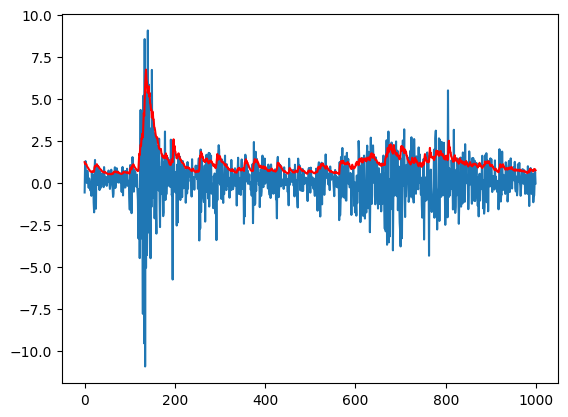

In [10]:
plt.plot(returns[start:])
plt.plot(pred, color="red")
plt.show()

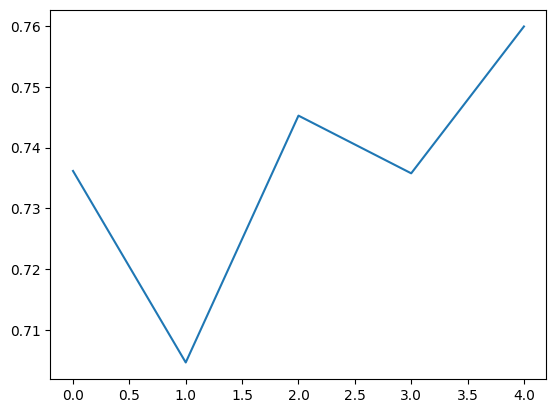

In [11]:
model = arch_model(returns, p=2, q=2)
yhat = np.sqrt(model.fit(disp="off").forecast(horizon=5).variance.values[-1,:])
plt.plot(yhat)